# Ploting different new features

In [2]:
pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28986 sha256=147fa98797760a68ede0e3d819c77a0b65d805158df3d2b48a9b4896692806fb
  Stored in directory: c:\users\mdurh\appdata\local\pip\cache\wheels\18\9a\81\694fa8602da445fa009fd13c8da25001be19efdfb67a9cc348
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\mdurh\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

import ta

In [4]:
# Load data
df = pd.read_csv('data/close.csv', sep=',')
df = ta.utils.dropna(df)

In [5]:
df.shape

(538, 11)

In [6]:
df.head()

,Date,ADA-USD,ATOM-USD,AVAX-USD,AXS-USD,BTC-USD,ETH-USD,LINK-USD,LUNA1-USD,MATIC-USD,SOL-USD
1288,2020-11-04,0.095369,4.385509,3.184633,0.145949,14133.707031,402.141998,10.472587,0.283994,0.012251,1.392255
1289,2020-11-05,0.096994,4.513780,3.358205,0.135104,15579.848633,414.067352,10.990669,0.292366,0.013477,1.405218
1290,2020-11-06,0.109105,4.871086,3.595282,0.143164,15565.880859,454.719299,12.118072,0.304737,0.015509,1.913740
1291,2020-11-07,0.101379,4.617722,3.403408,0.141056,14833.753906,435.713135,11.757224,0.292365,0.014393,2.031964
1292,2020-11-08,0.106621,4.803346,3.476598,0.198251,15479.567383,453.554779,12.656035,0.303016,0.015735,2.156598


In [6]:
# Add all ta features filling nans values
df = ta.add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume_BTC", fillna=True)

/home/vant/projects/python/ta/env-ta/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/home/vant/projects/python/ta/env-ta/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [7]:
df.shape

(46306, 69)

# Ploting some volatility features

### Bollinger Bands

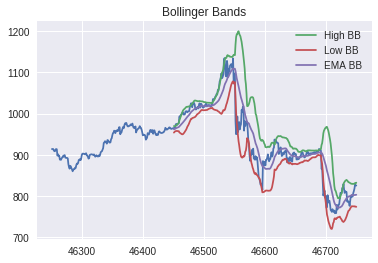

In [7]:
plt.plot(df[40500:41000].Close)
plt.plot(df[40700:41000].volatility_bbh, label='High BB')
plt.plot(df[40700:41000].volatility_bbl, label='Low BB')
plt.plot(df[40700:41000].volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

### Keltner Channel

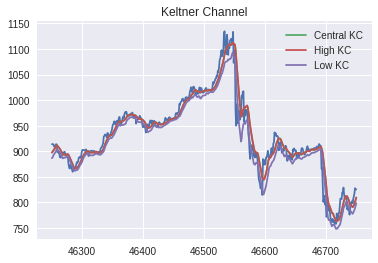

In [8]:
plt.plot(df[40500: 41000].Close)
plt.plot(df[40500: 41000].volatility_kcc, label='Central KC')
plt.plot(df[40500: 41000].volatility_kch, label='High KC')
plt.plot(df[40500: 41000].volatility_kcl, label='Low KC')
plt.title('Keltner Channel')
plt.legend()
plt.show()

### Donchian Channel

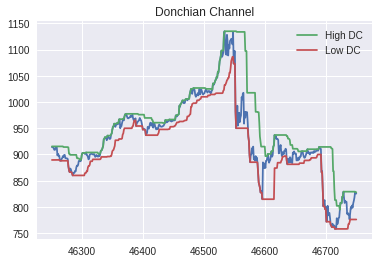

In [9]:
plt.plot(df[40500: 41000].Close)
plt.plot(df[40500: 41000].volatility_dch, label='High DC')
plt.plot(df[40500: 41000].volatility_dcl, label='Low DC')
plt.title('Donchian Channel')
plt.legend()
plt.show()

# Ploting trend features

### MACD

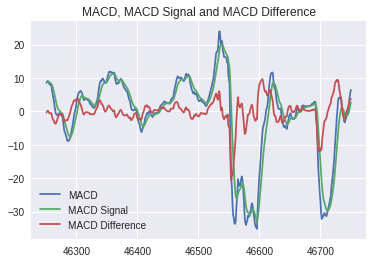

In [10]:
plt.plot(df[40500:41000].trend_macd, label='MACD')
plt.plot(df[40500:41000].trend_macd_signal, label='MACD Signal')
plt.plot(df[40500:41000].trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()

### KST

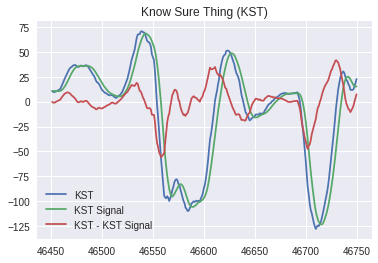

In [11]:
plt.plot(df[40700:41000].trend_kst, label='KST')
plt.plot(df[40700:41000].trend_kst_sig, label='KST Signal')
plt.plot(df[40700:41000].trend_kst_diff, label='KST - KST Signal')
plt.title('Know Sure Thing (KST)')
plt.legend()
plt.show()

### Ichimoku Kinkō Hyō

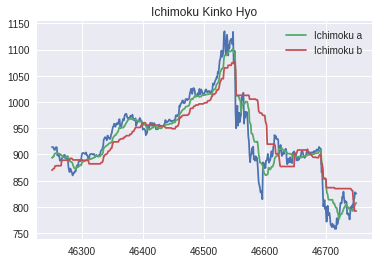

In [12]:
plt.plot(df[40500:41000].Close)
plt.plot(df[40500:41000].trend_ichimoku_a, label='Ichimoku a')
plt.plot(df[40500:41000].trend_ichimoku_b, label='Ichimoku b')
plt.title('Ichimoku Kinko Hyo')
plt.legend()
plt.show()

# Ploting all features

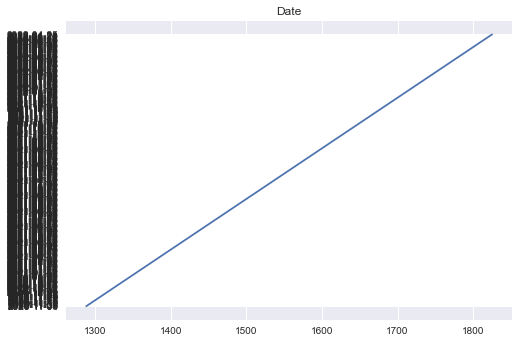

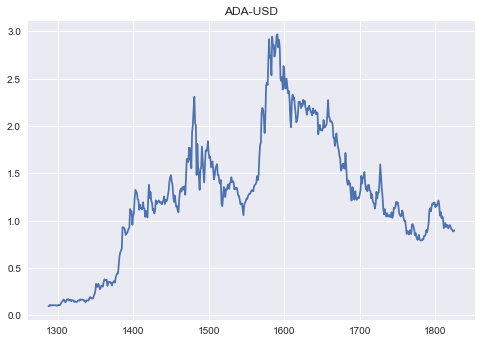

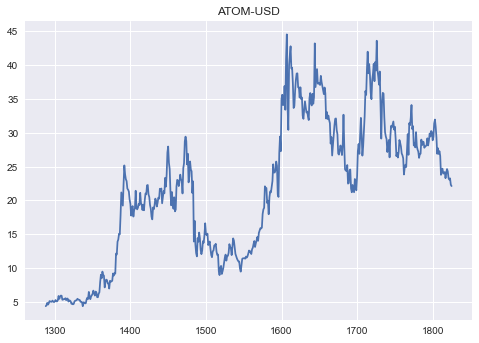

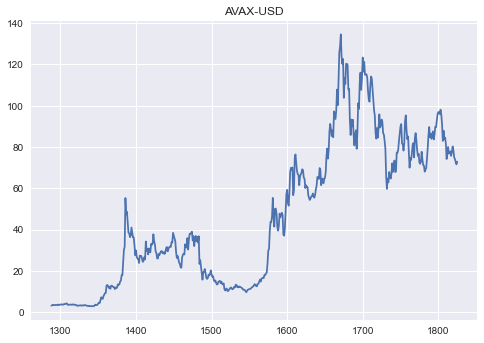

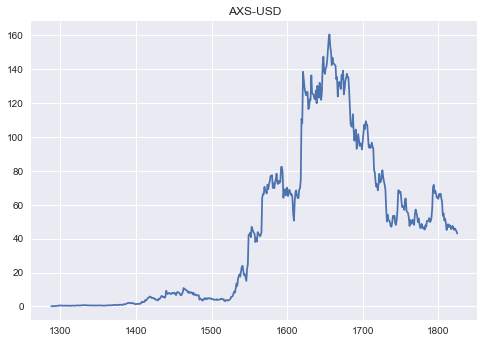

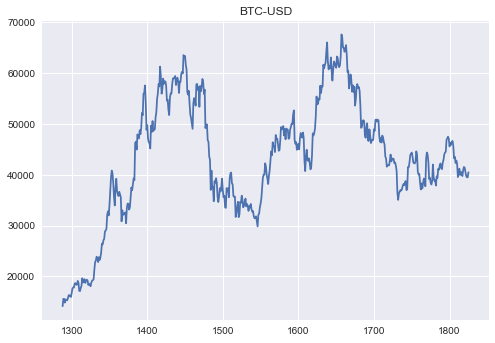

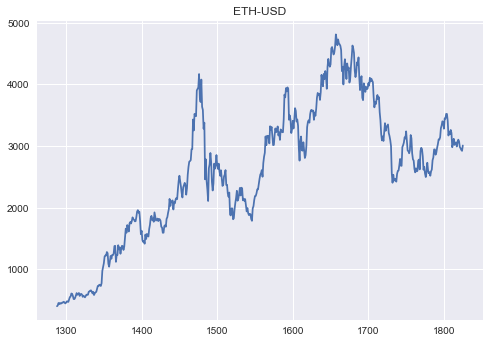

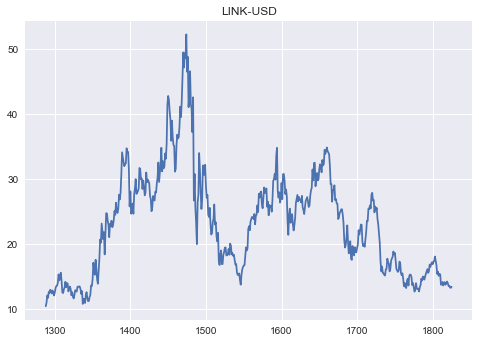

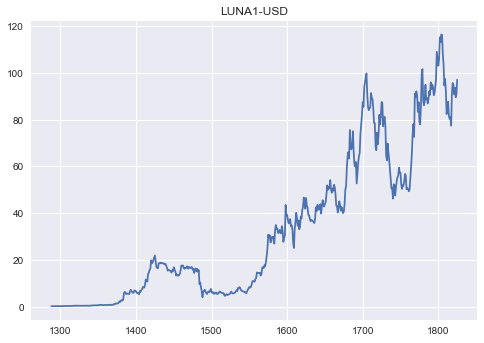

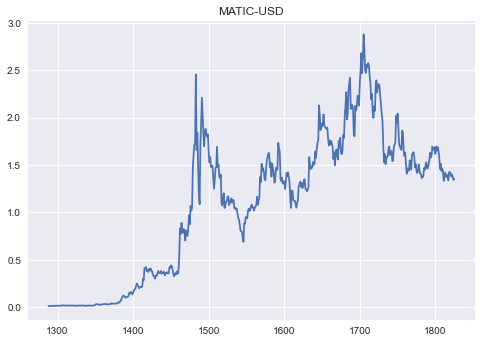

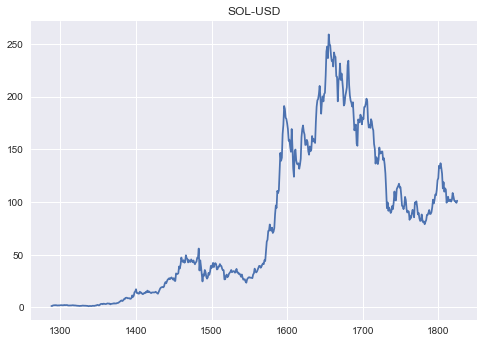

In [7]:
for col in df.columns:
    plt.plot(df[col])
    plt.title(col)
    plt.show()